In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [189]:
root_dir1 = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/10_10_lr0.2/r1'
root_dir2 = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/20_20_lr0.2/r1'

In [190]:
alg1, alg2 = 'fedavg', 'fedprox'

In [191]:
n = 50

In [192]:
train_losses = {}
train_accuracies = {}
train_loss_indexes = {}
test_losses = {}
test_accuracies = {}
test_loss_indexes = {}

In [ ]:
for alg, root_dir in zip([alg1, alg2], [root_dir1, root_dir2]):
    train_file = os.path.join(root_dir, 'train.csv')
    test_file = os.path.join(root_dir, 'test.csv')

    df = pd.read_csv(train_file)
    train_losses[alg] = df['train_losses'][:n]
    train_accuracies[alg] = df['train_accuracies'][:n]
    train_loss_indexes[alg] = df['train_index'][:n]

    df1 = pd.read_csv(test_file)
    test_losses[alg] = df1['test_losses'][:n]
    test_accuracies[alg] = df1['test_accuracies'][:n]
    test_loss_indexes[alg] = df1['test_index'][:n]

Text(0.5, 0, 'Round Number')

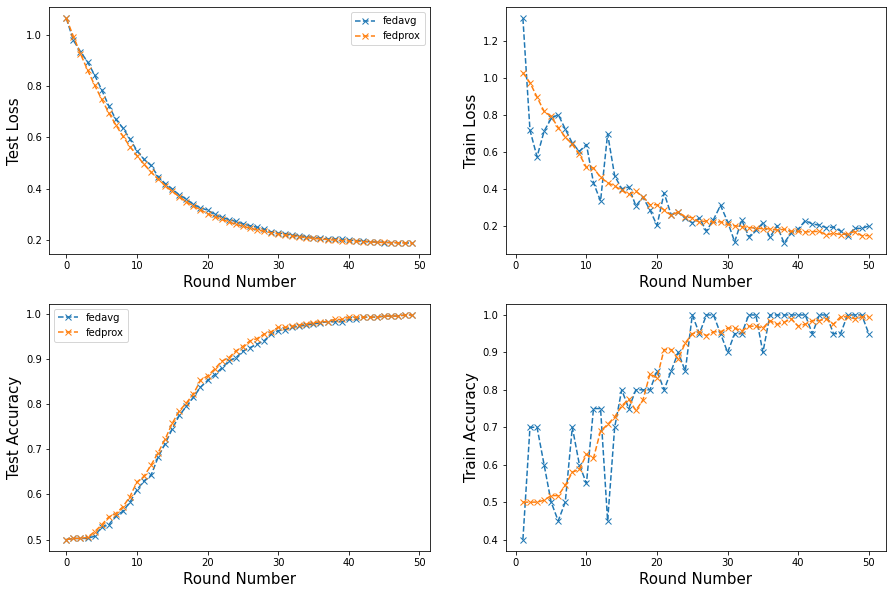

In [ ]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize=(15, 10))

for alg in [alg1, alg2]:
    axs1.plot(test_loss_indexes[alg], test_losses[alg], 'x--', label=alg)

    axs2.plot(train_loss_indexes[alg], train_losses[alg], 'x--', label=alg)

    axs3.plot(test_loss_indexes[alg], test_accuracies[alg], 'x--', label=alg)
        
    axs4.plot(train_loss_indexes[alg], train_accuracies[alg], 'x--', label=alg)    

axs1.legend()
axs1.set_ylabel('Test Loss', fontsize=15)
axs1.set_xlabel('Round Number', fontsize=15)
# axs1.tick_params(axis='both', labelsize=12)
# axs1.set_ylim(0.1, 0.6)

axs2.set_ylabel('Train Loss', fontsize=15)
axs2.set_xlabel('Round Number', fontsize=15)
# axs2.tick_params(axis='both', labelsize=12)

axs3.legend()
axs3.set_ylabel('Test Accuracy', fontsize=15)
axs3.set_xlabel('Round Number', fontsize=15)

axs4.set_ylabel('Train Accuracy', fontsize=15)
axs4.set_xlabel('Round Number', fontsize=15)

# plt.legend()
# fig.suptitle('Perceptron Training | local steps = 1000', fontsize=15)
# plt.savefig('../logs/figures/tau_1000_m_2.jpg', dpi=300)

### Plotting data points

In [ ]:
import random
import json
import numpy as np

In [ ]:
train_file = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/synthetic_data/train/train.json'
test_file = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/synthetic_data/test/test.json'

In [ ]:
with open(train_file) as f:
    train_data = json.load(f)

In [ ]:
with open(test_file) as f:
    test_data = json.load(f)

In [ ]:
outlier_user = train_data['users'][-1]
normal_user = train_data['users'][0]

In [ ]:
outlier_data = train_data['user_data'][outlier_user]
normal_data = train_data['user_data'][normal_user]

In [ ]:
xs2, ys2 = outlier_data['x'], outlier_data['y']
xs1, ys1 = normal_data['x'], normal_data['y']

In [ ]:
indices = random.choices(range(0, 100), k=50)

In [ ]:
xs1_subsampled = np.array([xs1[indice] for indice in indices])
ys1_subsampled = np.array([ys1[indice] for indice in indices])
xs2_subsampled = np.array([xs2[indice] for indice in indices])
ys2_subsampled = np.array([ys2[indice] for indice in indices])

Text(0.5, 1.0, 'Separator hyperplanes')

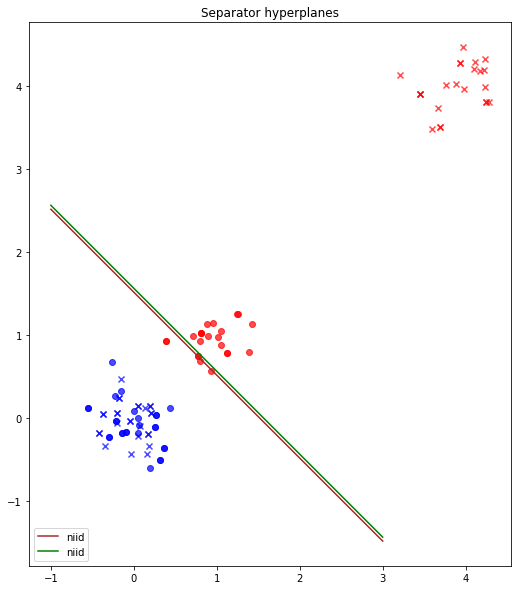

In [ ]:


fig, ax = plt.subplots(1,figsize=(10, 10))

for x, y, label in zip(xs1_subsampled[:,0], xs1_subsampled[:, 1], ys1_subsampled):
    ax.scatter(x, y, color= 'red' if(label == 1.0) else 'blue', alpha=0.7)

for x, y, label in zip(xs2_subsampled[:,0], xs2_subsampled[:, 1], ys2_subsampled):
    ax.scatter(x, y, color= 'red' if(label == 1.0) else 'blue', marker='x', alpha=0.7)


ax.plot(lxs1, lys1, color='brown', label='niid')
ax.plot(lxs2, lys2, color='green', label = 'niid')
ax.set_aspect('equal')
ax.legend(loc="lower left")
ax.set_title('Separator hyperplanes')
# plt.savefig('../logs/figures/tau_1000_m_2_separator.jpg', dpi=300)

### Loading trained model parameters

In [ ]:
from models import get_perceptron
import tensorflow as tf

In [ ]:
keras_model = get_perceptron()
keras_model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.0)]  
        )

# loss(y_groundtruth,yestimate)

In [ ]:
trained_model_path1 = os.path.join(root_dir1, 'trained_model')
trained_model_path2 = os.path.join(root_dir2, 'trained_model')

In [ ]:
keras_model.load_weights(trained_model_path1)
theta = keras_model.variables[0].numpy()
bias = keras_model.variables[1].numpy()[0]
theta1 = theta[0][0]; theta2 = theta[1][0]
print(theta1, theta2, bias)
lxs1 = np.linspace(-1.0, 3.0, 100)
lys1 = [-(theta1*x+bias)/theta2 for x in lxs1]

1.0 1.0 -1.5123718


In [ ]:
keras_model.load_weights(trained_model_path2)
theta = keras_model.variables[0].numpy()
bias = keras_model.variables[1].numpy()[0]
theta1 = theta[0][0]; theta2 = theta[1][0]
print(theta1, theta2, bias)
lxs2 = np.linspace(-1.0, 3.0, 100)
lys2 = [-(theta1*x+bias)/theta2 for x in lxs2]

1.0 1.0 -1.5599663


### Plotting impact of heteroegeneity with varying client local steps

In [ ]:
local_steps = [10, 50, 300, 1000]
alg1 = 'iid'; alg2 = 'niid'

In [ ]:
dir1 = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/10_10_lr0.2/r1'
dir2 = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/50_50_lr0.2/r1'
dir3 = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/300_300_lr0.2/r1'
dir4 = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/1000_1000_lr0.2/r1'
dirs = [10,50,300,1000]
algs=['iid']

In [224]:

data_iid = pd.read_csv('/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/iid/1000_1000_lr0.2/r1/test.csv')
test_loss_indices = data_iid['test_index'][:]
test_loss_iid = data_iid['test_losses'][:]

for _dir in dirs:
    root_dir = f'/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/{_dir}_{_dir}_lr0.2/r1'
    print(root_dir)
    
    train_losses[_dir] = {}
    train_accuracies[_dir] = {}
    train_loss_indexes[_dir] = {}
    test_losses[_dir] = {}
    test_accuracies[_dir] = {}
    test_loss_indexes[_dir] = {}
    
    train_file = os.path.join(root_dir, 'train.csv')
    test_file = os.path.join(root_dir, 'test.csv')

    df = pd.read_csv(train_file)
    train_losses[_dir] = df['train_losses'][:]
    train_accuracies[_dir] = df['train_accuracies'][:]
    train_loss_indexes[_dir] = df['train_index'][:]

    df1 = pd.read_csv(test_file)
    test_losses[_dir] = df1['test_losses'][:]
    test_accuracies[_dir] = df1['test_accuracies'][:]
    test_loss_indexes[_dir] = df1['test_index'][:]

/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/10_10_lr0.2/r1
/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/50_50_lr0.2/r1
/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/300_300_lr0.2/r1
/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/1000_1000_lr0.2/r1


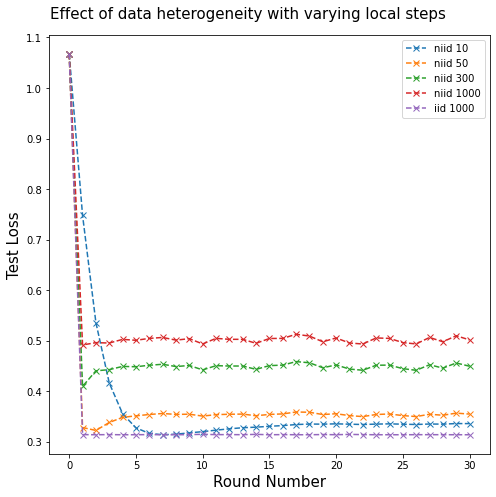

In [228]:
fig, ax = plt.subplots(1, figsize=(7, 7))

for _dir in dirs:
    ax.plot(test_loss_indexes[_dir], test_losses[_dir], 'x--', label=f'niid {_dir}')    

ax.plot(test_loss_indices, test_loss_iid, 'x--', label='iid 1000')    

ax.legend()
ax.set_ylabel('Test Loss', fontsize=15)
ax.set_xlabel('Round Number', fontsize=15)
fig.suptitle('Effect of data heterogeneity with varying local steps', fontsize=15)
fig.tight_layout()
plt.savefig('/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/figures/synthetic_loss.pdf', dpi=300)

### Plotting trained weights for varying local steps

In [ ]:
local_steps = [10, 50, 300, 1000]
alg1 = 'iid'; alg2 = 'niid'

In [276]:
keras_model = get_perceptron()
keras_model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.0)]  
        )

loss = tf.keras.losses.BinaryCrossentropy
loss()

1.0 1.0 -1.0295453
4/4 [==============================] - 0s 1ms/step - loss: 4.9907 - binary_accuracy: 0.5000


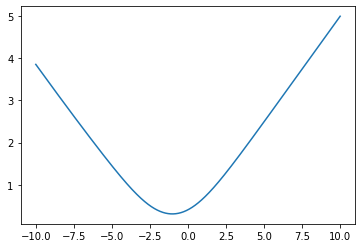

In [324]:
class SyntheticData:
    def __init__(self, train_dir, test_dir):
        with open(os.path.join(train_dir, 'train.json')) as f:
            train_d = json.load(f)
        
        self.client_ids, self.num_samples, self.train_data = train_d['users'], train_d['num_samples'], train_d['user_data']
        
        with open(os.path.join(test_dir, 'test.json')) as f:
            test_d = json.load(f)
        
        self.test_data = test_d['user_data']

    def get_client_ids(self):
        return self.client_ids

    def create_dataset_for_client(self, client_id):
        client_data = self.train_data[client_id]
        return tf.data.Dataset.from_tensor_slices((client_data['x'], client_data['y'])).map(lambda a,b: (tf.cast(a, tf.float64), tf.cast(b, tf.float64)))

    def create_train_dataset_for_all_clients(self):
        xs = list()
        ys = list()
        for data in self.train_data.values():
            for x in data['x']:
                xs.append(x)
            for y in data['y']:
                ys.append(y)
        xs = np.array(xs)
        ys = np.array(ys)
        return tf.data.Dataset.from_tensor_slices((xs, ys))

    def create_test_dataset_for_all_clients(self):
        xs = list()
        ys = list()
        for data in self.test_data.values():
            for x in data['x']:
                xs.append(x)
            for y in data['y']:
                ys.append(y)
        xs = np.array(xs)
        ys = np.array(ys)
        return tf.data.Dataset.from_tensor_slices((xs, ys)).map(lambda a,b: (tf.cast(a, tf.float64), tf.cast(b, tf.float64)))

keras_model = get_perceptron()
keras_model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.0)]  
        )
local_step = 1000
file_path = f'/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/iid/{local_step}_{local_step}_lr0.2'
trained_model_path = os.path.join(file_path, 'r1', 'trained_model')
keras_model.load_weights(trained_model_path)
theta = keras_model.variables[0].numpy()
bias = keras_model.variables[1].numpy()[0]

theta1 = theta[0][0]; theta2 = theta[1][0]
print(theta1,theta2,bias)

# keras_model.evaluate(test_data)
TEST_BATCH_SIZE = 100
data = SyntheticData('/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/synthetic_data/train','/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/synthetic_data/test')
central_test_dataset = data.create_test_dataset_for_all_clients().batch(TEST_BATCH_SIZE)

w =  keras_model.get_weights()

bs = np.linspace(-10,10,2000)
l = np.zeros_like(bs)
for i,b in enumerate(bs):
    w[1]  = np.array([b])
    keras_model.set_weights(w)
    l[i],_ = keras_model.evaluate(central_test_dataset)
    

plt.plot(bs,l)

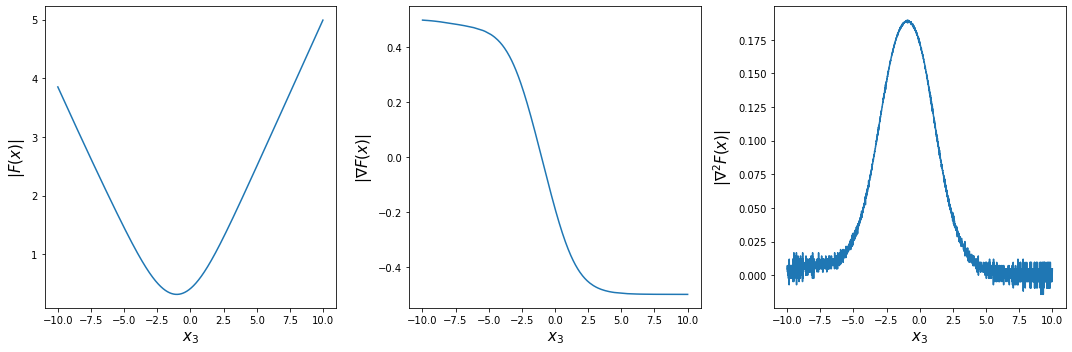

In [353]:
dx = bs[2]-bs[1]
dl = (1/dx)*(l[:-1]-l[1:])
ddl = (1/dx)*(dl[:-1]-dl[1:])

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(bs[:],l)
ax[0].set_ylabel(r'$\|F(x)\|$',fontsize=15)
ax[0].set_xlabel(r'$x_3$',fontsize=15)
ax[1].plot(bs[1:],dl)
ax[1].set_ylabel(r'$\|\nabla F(x)\|$',fontsize=15)
ax[1].set_xlabel(r'$x_3$',fontsize=15)
ax[2].plot(bs[2:],ddl)
ax[2].set_ylabel(r'$\|\nabla ^2 F(x)\|$',fontsize=15)
ax[2].set_xlabel(r'$x_3$',fontsize=15)
fig.tight_layout()

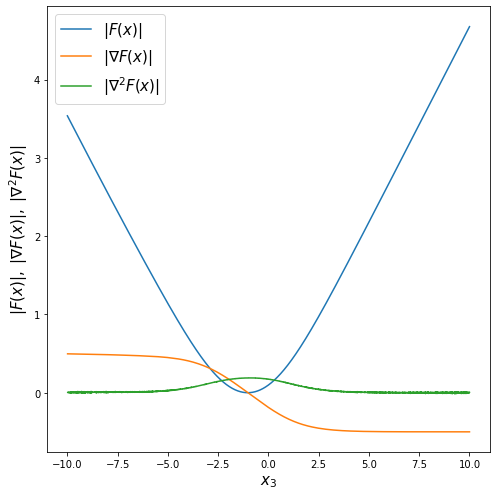

In [455]:
dx = bs[2]-bs[1]
dl = (1/dx)*(l[:-1]-l[1:])
ddl = (1/dx)*(dl[:-1]-dl[1:])

fig, ax = plt.subplots(figsize=(7,7))

ax.plot(bs[:],l-np.amin(l), label=r'$\|F(x)\|$')
ax.plot(bs[1:],dl, label=r'$\|\nabla F(x)\|$')
ax.plot(bs[2:],ddl,label=r'$\| \nabla ^2 F(x)\|$')
ax.set_xlabel(r'$x_3$',fontsize=15)
ax.set_ylabel(r'$\|F(x)\|,~\|\nabla F(x)\|,~\|\nabla^2 F(x)\|$' ,fontsize=15)
ax.legend(loc='upper left',fontsize=15)
fig.tight_layout()

In [375]:
D

3.0255127563781894

Evaluating the bound for zeta=0.406699512898922; L=0.18965100027621823
tau = 1 : bound = 0.022585771942470818
tau = 10 : bound = 2.2585771942470814
tau = 50 : bound = 56.46442985617705
tau = 500 : bound = 5646.442985617705
tau = 1000 : bound = 22585.77194247082


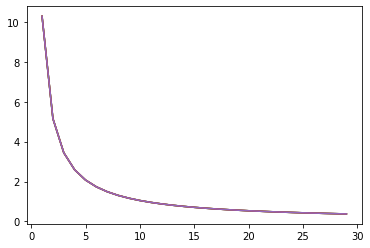

In [419]:
D = 1-bs[np.argmin(l)]
_L = np.amax(np.abs(ddl))
_zeta = np.mean(np.array(grad_diffs_all[1000][alg2][10:]))
print(r"Evaluating the bound for zeta="+ str(_zeta)+r"; L=" +  str(L))

fb = []
bounds = []

taus = [1,10,50,500,1000]

for _tau in taus:
    _eta = 0.2

    fixed_bound = 18 * _L * _tau**2 * _eta**2 * _zeta**2
    Ts = np.array(grad_diffs_all[local_step]['xs'])[1:]
    fb.append(fixed_bound)
    bounds.append((1/Ts)* D**2 / (2*_eta) + fixed_bound)
    print(f"tau = {_tau} : bound = {fixed_bound}")

for i, _tau in enumerate(taus):
    plt.plot(Ts,bounds[0])




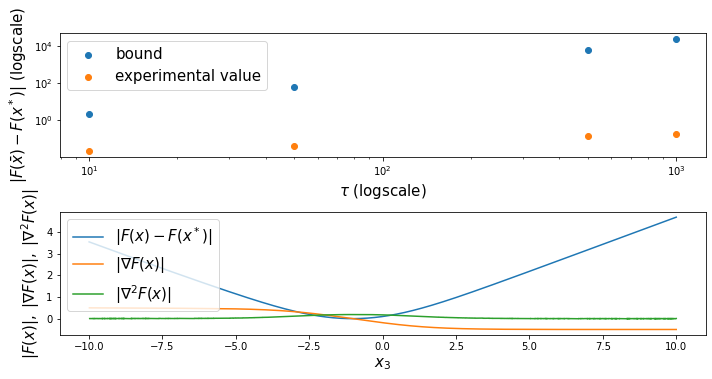

In [460]:
fig, ax = plt.subplots(2,1,figsize =(7,))
ax[0].scatter(taus[1:],fb[1:],label='bound')
true_val = []
for _dir in dirs:
    true_val.append(np.mean((test_losses[_dir]-np.amin(l))[20:]))
    
ax[0].scatter(taus[1:],true_val,label='experimental value')
ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[0].set_ylabel(r'$|F(\bar{x})-F({x}^*)|$ (logscale)',fontsize=15)
ax[0].set_xlabel(r'$\tau$ (logscale)',fontsize=15)

ax[0].legend(loc='upper left',fontsize=15)

dl = (1/dx)*(l[:-1]-l[1:])
ddl = (1/dx)*(dl[:-1]-dl[1:])

# fig, ax = plt.subplots(figsize=(7,7))

ax[1].plot(bs[:],l-np.amin(l), label=r'$\|F(x)-F(x^*)\|$')
ax[1].plot(bs[1:],dl, label=r'$\|\nabla F(x)\|$')
ax[1].plot(bs[2:],ddl,label=r'$\| \nabla ^2 F(x)\|$')
ax[1].set_xlabel(r'$x_3$',fontsize=15)
ax[1].set_ylabel(r'$\|F(x)\|,~\|\nabla F(x)\|,~\|\nabla^2 F(x)\|$' ,fontsize=15)
ax[1].legend(loc='upper left',fontsize=15)
fig.tight_layout()

plt.savefig('/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/figures/tightness.pdf', dpi=300)

In [312]:
w =  keras_model.get_weights()
print(w)
w[1]  = np.array([1.0])
print(w)
keras_model.set_weights(w)

[array([[1.],
       [1.]], dtype=float32), array([-1.0295453], dtype=float32)]
[array([[1.],
       [1.]], dtype=float32), array([1.])]


In [ ]:
lines = {}

In [212]:
for local_step in local_steps:
    lines[local_step] = {}

    file_path = f'/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/{local_step}_{local_step}_lr0.2'
    trained_model_path = os.path.join(file_path, 'r1', 'trained_model')
    keras_model.load_weights(trained_model_path)
    
    theta = keras_model.variables[0].numpy()
    bias = keras_model.variables[1].numpy()[0]
    theta1 = theta[0][0]; theta2 = theta[1][0]
    print(theta1, theta2, bias)
    lxs1 = np.linspace(-1.0, 5.0, 100)
    lys1 = [-(theta1*x+bias)/theta2 for x in lxs1]

    lines[local_step]['xs'] = lxs1
    lines[local_step]['ys'] = lys1

# extra step for 3000-iid data
local_step = 1000
file_path = f'/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/iid/{local_step}_{local_step}_lr0.2'
trained_model_path = os.path.join(file_path, 'r1', 'trained_model')
keras_model.load_weights(trained_model_path)

theta = keras_model.variables[0].numpy()
bias = keras_model.variables[1].numpy()[0]
theta1 = theta[0][0]; theta2 = theta[1][0]
print(theta1, theta2, bias)
lxs1 = np.linspace(-1.0, 3.0, 100)
lys1 = [-(theta1*x+bias)/theta2 for x in lxs1]

xs_iid = lxs1
ys_iid = lys1

1.0 1.0 -1.5123718
1.0 1.0 -1.6892701
1.0 1.0 -2.2445855
1.0 1.0 -2.4677014
1.0 1.0 -1.0295453


In [213]:
train_file = '/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/synthetic_data/train/train.json'

with open(train_file) as f:
    train_data = json.load(f)

In [221]:
outlier_user = train_data['users'][-1]
normal_user = train_data['users'][0]

outlier_data = train_data['user_data'][outlier_user]
normal_data = train_data['user_data'][normal_user]

xs2, ys2 = outlier_data['x'], outlier_data['y']
xs1, ys1 = normal_data['x'], normal_data['y']

indices = random.choices(range(0, 100), k=50)

xs1_subsampled = np.array([xs1[indice] for indice in indices])
ys1_subsampled = np.array([ys1[indice] for indice in indices])
xs2_subsampled = np.array([xs2[indice] for indice in indices])
ys2_subsampled = np.array([ys2[indice] for indice in indices])

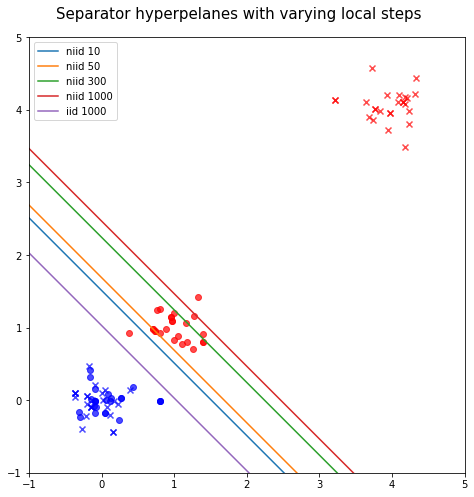

In [231]:
fig, ax = plt.subplots(1, figsize =(7,7))
for x, y, label in zip(xs1_subsampled[:,0], xs1_subsampled[:, 1], ys1_subsampled):
    ax.scatter(x, y, color= 'red' if(label == 1.0) else 'blue', alpha=0.7)

for x, y, label in zip(xs2_subsampled[:,0], xs2_subsampled[:, 1], ys2_subsampled):
    ax.scatter(x, y, color= 'red' if(label == 1.0) else 'blue', marker='x', alpha=0.7)

for local_step in local_steps:
    ax.plot(lines[local_step]['xs'], lines[local_step]['ys'], label=f'niid {local_step}')


ax.plot(xs_iid, ys_iid, label='iid 1000')
ax.set_xlim([-1,5])
ax.set_ylim([-1,5])
plt.legend()
ax.set_aspect('equal')

fig.suptitle('Separator hyperpelanes with varying local steps',fontsize=15)
fig.tight_layout()
plt.savefig('/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/figures/synthetic_separator.pdf', dpi=300)

## Cool 3 subplots plot

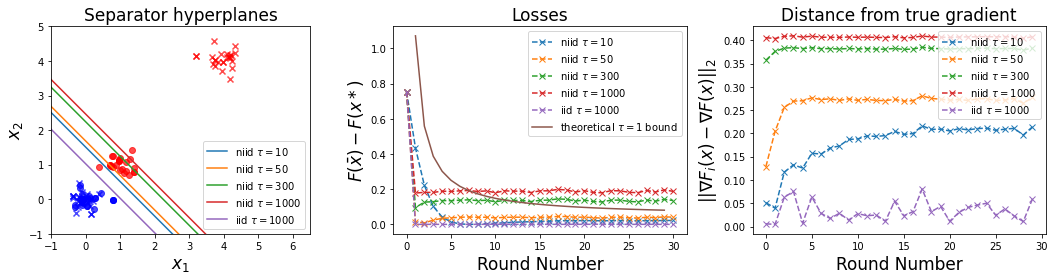

In [405]:
fig, ax = plt.subplots(1,3, figsize =(15,4))
for x, y, label in zip(xs1_subsampled[:,0], xs1_subsampled[:, 1], ys1_subsampled):
    ax[0].scatter(x, y, color= 'red' if(label == 1.0) else 'blue', alpha=0.7)

for x, y, label in zip(xs2_subsampled[:,0], xs2_subsampled[:, 1], ys2_subsampled):
    ax[0].scatter(x, y, color= 'red' if(label == 1.0) else 'blue', marker='x', alpha=0.7)

for local_step in local_steps:
    ax[0].plot(lines[local_step]['xs'], lines[local_step]['ys'], label=r'niid $\tau=$'+str(local_step))


_fs=17

ax[0].plot(xs_iid, ys_iid, label=r'iid $\tau=$1000')
ax[0].set_xlim([-1,6.5])
ax[0].set_ylim([-1,5])
ax[0].set_xlabel('$x_1$', fontsize=_fs)
ax[0].set_ylabel('$x_2$', fontsize=_fs)
ax[0].legend()
ax[0].set_aspect('equal')
ax[0].set_title('Separator hyperplanes',fontsize=_fs)

for _dir in dirs:
    ax[1].plot(test_loss_indexes[_dir], test_losses[_dir]-np.amin(l), 'x--', label=r'niid $\tau=$'+str(_dir))

ax[1].plot(test_loss_indices, test_loss_iid-np.amin(l), 'x--', label=r'iid $\tau=$1000')    
ax[1].plot(Ts,bounds[0],label=r'theoretical $\tau=$1 bound')   

ax[1].legend()
ax[1].set_ylabel(r'$F(\bar{x}) - F(x*)$', fontsize=_fs)
ax[1].set_xlabel('Round Number', fontsize=_fs)
ax[1].set_title('Losses', fontsize=_fs)

for local_step in local_steps:
    ax[2].plot(grad_diffs_all[local_step]['xs'], grad_diffs_all[local_step][alg2], 'x--', label=r'niid $\tau=$'+str(local_step))

local_step = 1000
ax[2].plot(grad_diffs_all[local_step]['xs'], grad_diffs_all[local_step][alg1], 'x--', label=r'iid $\tau=$'+str(local_step))

ax[2].set_xlabel('Round Number', fontsize=_fs)
ax[2].set_ylabel(r'$||\nabla F_i(x) - \nabla F(x)||_2$', fontsize=_fs)
ax[2].legend(loc='upper right')
ax[2].set_title('Distance from true gradient', fontsize=_fs)
ax[2].set_xlabel('Round Number', fontsize=_fs)
ax[2].set_ylabel(r'$||\nabla F_i(x) - \nabla F(x)||_2$', fontsize=_fs)
# plt.savefig('../logs/figures/full_data_htr_gradients.jpg', dpi=300)

fig.tight_layout() 
plt.savefig('/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/figures/3_plots.pdf', dpi=300)

### Plot local and global gradient differences

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
root_dir = '/mnt/nfs/dhasade/optml/logs/fedavg/gradients/synthetic/300_300_lr0.2/r1'
file_path = os.path.join(root_dir, 'grad_diffs.csv')

In [ ]:
with open(file_path) as f:
    df = pd.read_csv(file_path, header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/nfs/dhasade/optml/logs/fedavg/gradients/synthetic/300_300_lr0.2/r1/grad_diffs.csv'

In [ ]:
nrows = df.shape[0]

In [ ]:
local_steps = [10, 50, 300, 1000]
alg1 = 'iid client'; alg2 = 'niid client'

In [ ]:
grad_diffs_all = {}

In [247]:
for local_step in local_steps:
    grad_diffs_all[local_step] = {}

    root_dir = f'/Users/renard/Documents/etudes/EPFLMA4/OML/project/optml-project/logroot/synthetic/niid/{local_step}_{local_step}_lr0.2'
    file_path = os.path.join(root_dir, 'r1', 'grad_diffs.csv')
    
    with open(file_path) as f:
        df = pd.read_csv(file_path, header=None)
    
    nrows, ncols = df.shape
    grad_diffs_all[local_step] = {alg1:df[0], alg2:df[ncols-1], 'xs':list(range(nrows))}
    

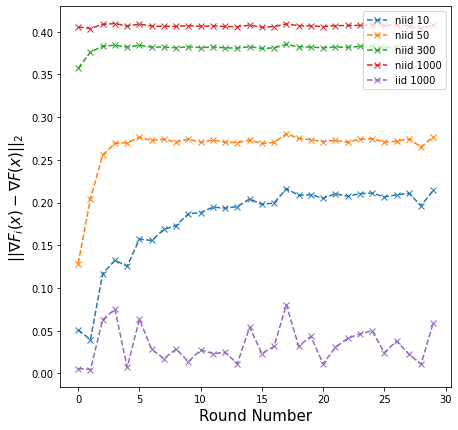

In [248]:
fig, ax = plt.subplots(1,figsize =(7,7))

for local_step in local_steps:
    ax.plot(grad_diffs_all[local_step]['xs'], grad_diffs_all[local_step][alg2], 'x--', label=f'niid {local_step}')

local_step = 1000
ax.plot(grad_diffs_all[local_step]['xs'], grad_diffs_all[local_step][alg1], 'x--', label=f'iid {local_step}')


ax.set_xlabel('Round Number', fontsize=15)
ax.set_ylabel(r'$||\nabla F_i(x) - \nabla F(x)||_2$', fontsize=15)
ax.legend(loc='upper right')
# plt.savefig('../logs/figures/full_data_htr_gradients.jpg', dpi=300)